# Load Dataset

In [2]:
twitch = pd.read_csv("twitch.csv")
twitch_df = twitch.copy()
twitch_df.tail(2)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,2013-11-20 10:15
999,Remx,122192850,99180,13788,1205,178553,59432,2049420,True,False,French,2013-12-21 0:22


# Explore Dataset

In [3]:
twitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
 11  Date                  992 non-null    object
dtypes: bool(2), int64(7), object(3)
memory usage: 80.2+ KB


In [4]:
twitch['Stream time(minutes)'].max()/60/24

362.1145833333333

In [5]:
twitch['Language'].value_counts()

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Other           1
Swedish         1
Slovak          1
Greek           1
Finnish         1
Name: Language, dtype: int64

# Preprocessing 

In [6]:
# Categorical Variables

In [7]:
twitch['English'] = twitch['Language'] == "English"
twitch['English'] = twitch['English'].astype('int')
twitch['Partnered'] = twitch['Partnered'].astype('int')
twitch['Mature'] = twitch['Mature'].astype('int')

In [8]:
# Datetime

In [9]:
twitch['Date'] = pd.to_datetime(twitch['Date'])

In [10]:
from datetime import datetime, timedelta

time = datetime(2020, 9, 1)

twitch['Date'] = time - twitch['Date']

twitch['Date'] = list(date.days for date in twitch['Date'])

In [11]:
# Null

In [12]:
twitch['Date'][twitch['Date'].isna()] = twitch['Date'].median()

# EDA

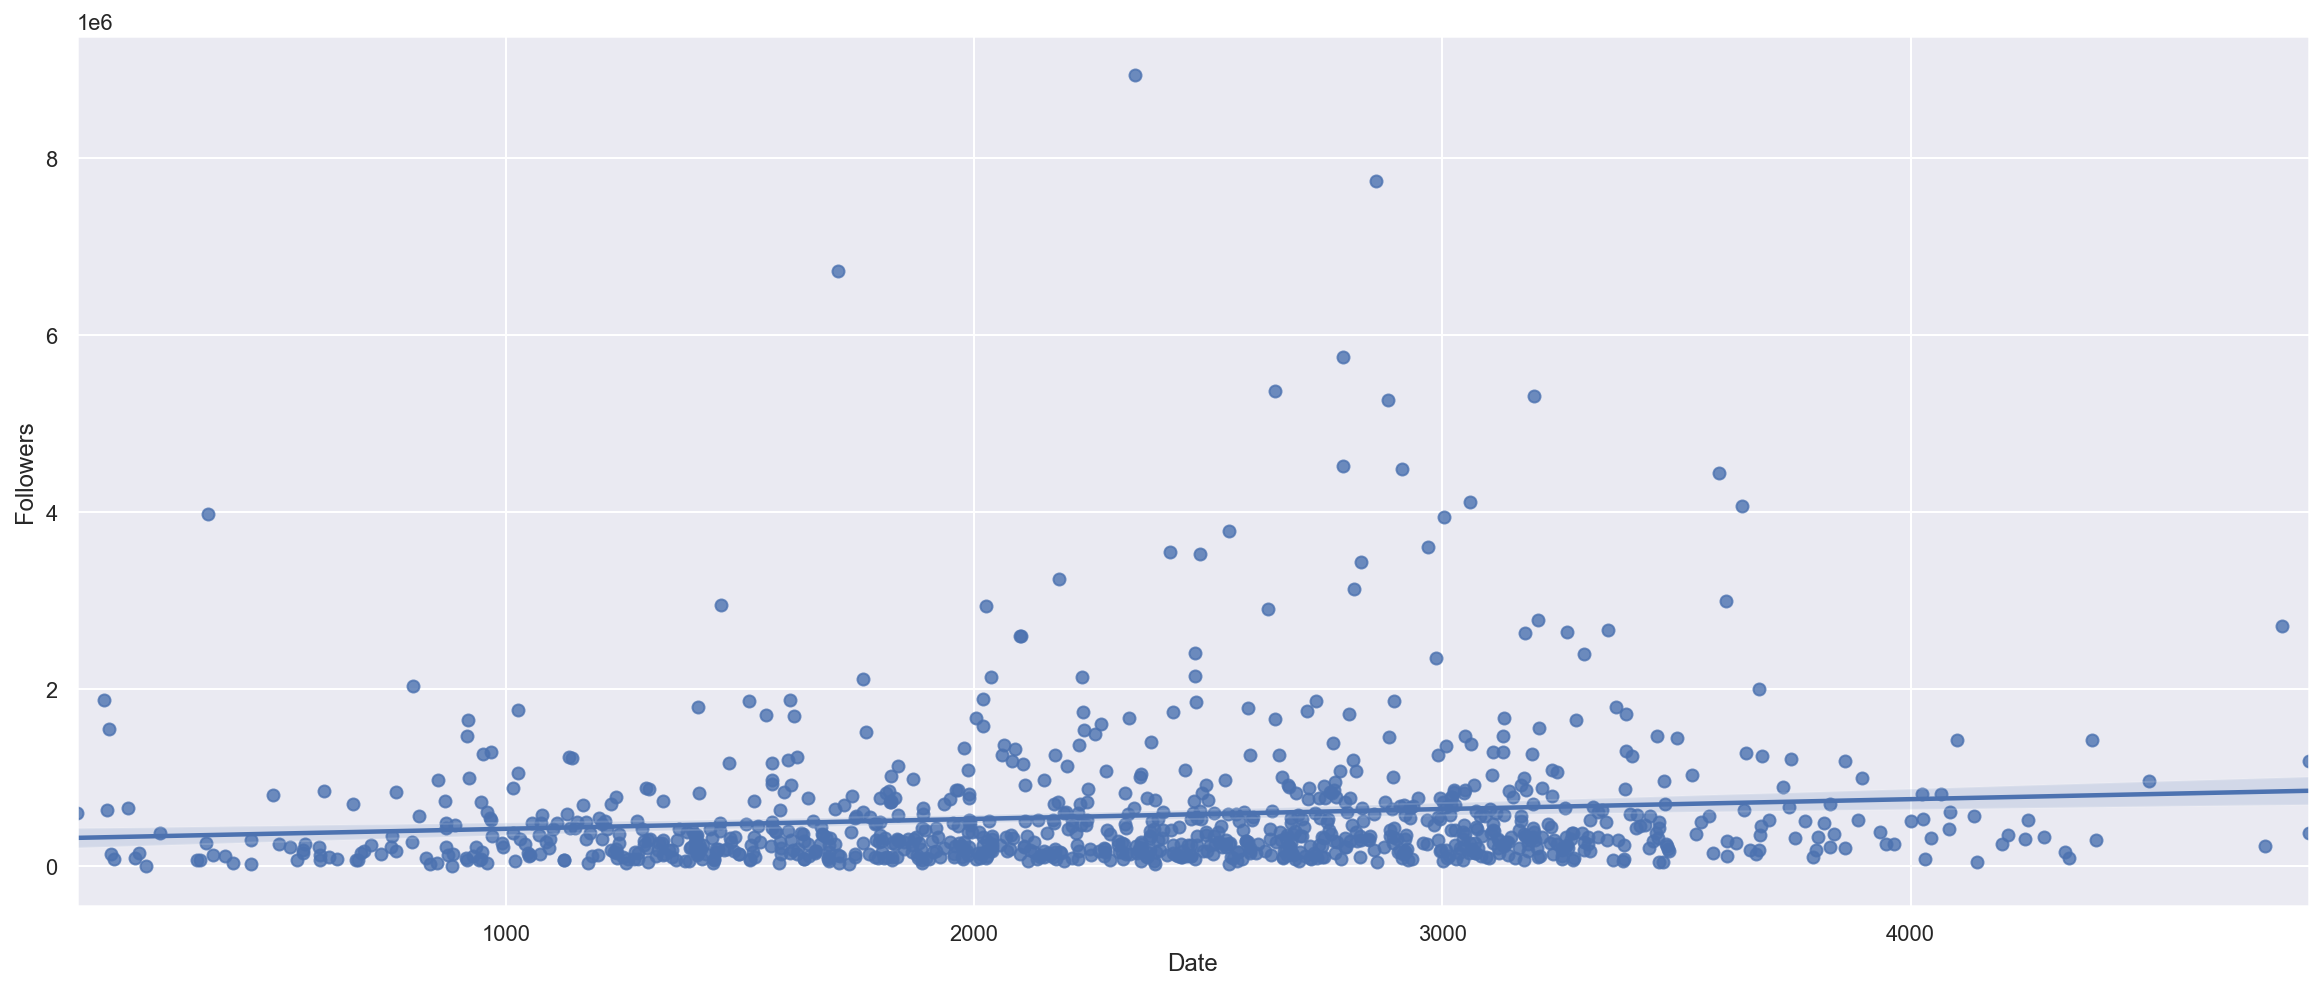

In [47]:
plt.figure(figsize=(20,8))
sns.regplot(x='Date', y='Followers', data=twitch);

In [21]:
corr_matrix = twitch.corr()
corr_matrix

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Date,English
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862,0.038258,-0.043197,0.037790,0.094492
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370,-0.007073,0.044978,-0.019371,0.045116
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063,0.028112,-0.082750,0.019987,0.073642
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349,-0.008983,-0.081648,0.002039,0.038105
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467,0.044418,-0.088521,0.122110,0.163707
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297,0.027465,-0.093001,-0.103026,-0.006353
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000,-0.035313,-0.088119,-0.025051,0.033871
Partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,0.027465,-0.035313,1.000000,0.000972,0.138880,0.022780
Mature,-0.043197,0.044978,-0.082750,-0.081648,-0.088521,-0.093001,-0.088119,0.000972,1.000000,0.072779,0.116251
Date,0.037790,-0.019371,0.019987,0.002039,0.122110,-0.103026,-0.025051,0.138880,0.072779,1.000000,0.213450


# Linear Regression

In [27]:
# All Variables

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X = twitch.drop(columns=['Channel','Language','Followers gained'])
y = twitch['Followers gained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

estimators = [('scaler', StandardScaler()),
             ('clf', LinearRegression())]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

lin_mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print('Train rmse : ', rmse_tr)
print('Test rmse : ', rmse_test)
print('Test mae : ', lin_mae)
print('Test r2 : ', r2)

Train rmse :  229207.65080204472
Test rmse :  183302.74023600895
Test mae :  113639.77413584937
Test r2 :  0.4860754096780424


# Function

In [33]:
def lin_regr(data, columns, label):

    df = []

    for column in columns:
        X = data.drop(columns = column + [label])
        y = data[label]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
        
        clf_list = [LinearRegression(), ElasticNet(alpha=0.1, l1_ratio=0.5)]
        
        for clf in clf_list:
        
            estimators = [('scaler', StandardScaler()),
                         ('clf', clf)]

            pipe = Pipeline(estimators)

            pipe.fit(X_train, y_train)

            y_pred_tr = pipe.predict(X_train)
            y_pred_test = pipe.predict(X_test)

            rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
            rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
            lin_mae = mean_absolute_error(y_test, y_pred_test)
            r2 = r2_score(y_test, y_pred_test)
            mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

            df.append({'Label' : label, 'Drop Columns' : column, 'clf' : clf, 
                       'Train RMSE' : int(round(rmse_tr)), 'Test RMSE' : int(round(rmse_test)), 
                       'MAE' : int(round(lin_mae)), 'MAPE' : int(round(mape)), 'R2_Score' : round(r2, 2)})

    df = pd.DataFrame(df)
    return df

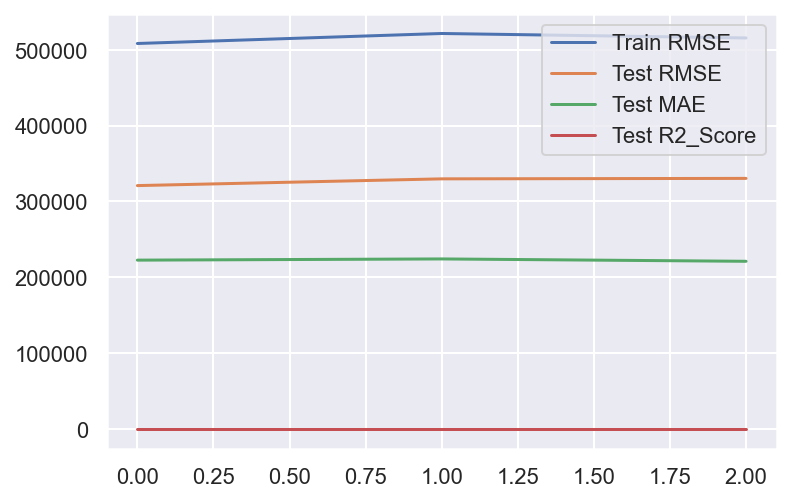

In [34]:
df.plot();

# Drop Outlier

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = df[column][(df[column] < lowest_val) | (df[column] > highest_val)].index
    
    return outlier_index

In [ ]:
outlier_index = get_outlier(df=twitch, column='Peak viewers', weight=1.5)
twitch_outlier = twitch.drop(outlier_index, axis=0)
twitch_outlier.shape

In [ ]:
outlier_index = get_outlier(df=twitch, column='Followers gained', weight=1.5)
twitch_outlier_2 = twitch.drop(outlier_index, axis=0)
twitch_outlier_2.shape

In [ ]:
outlier_index = get_outlier(df=twitch, column='Stream time(minutes)', weight=1.5)
twitch_outlier_3 = twitch.drop(outlier_index, axis=0)
twitch_outlier_3.shape

# Drop 24hr Channels

In [35]:
twitch_str_time = twitch.sort_values(by = "Stream time(minutes)", ascending=False)
twitch_str_time.reset_index(inplace=True, drop=True)
twitch_str_time.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date,English
0,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,1,0,English,4030.0,1
1,RelaxBeats,123273930,521430,2830,235,166162,29595,1094850,1,0,English,1230.0,1
2,Monstercat,163589370,519675,14261,313,788684,22331,4084222,1,0,English,3151.0,1
3,RocketBeansTV,360858030,518415,5223,696,416018,27024,5973152,1,0,German,2573.0,0
4,SaltyTeemo,247613265,517980,1803,476,173196,36103,2117741,0,0,English,2498.0,1


In [36]:
index = [x for x in list(range(30)) if x not in [7,11,13,15,17,21,27,28]]
twitch_cln = twitch_str_time.drop(index=index)
twitch_cln = twitch_cln.sort_values(by="Watch time(Minutes)", ascending=False)

# TEST

In [37]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch, columns, 'Followers gained')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers gained,"[Channel, Language]",LinearRegression(),229208,183303,113640,143,0.49
1,Followers gained,"[Channel, Language]",ElasticNet(alpha=0.1),229583,181818,111823,139,0.49
2,Followers gained,"[Channel, Language, Date]",LinearRegression(),235987,192824,118704,148,0.43
3,Followers gained,"[Channel, Language, Date]",ElasticNet(alpha=0.1),236303,190949,116668,145,0.44
4,Followers gained,"[Channel, Language, English]",LinearRegression(),230847,185155,110955,127,0.48
5,Followers gained,"[Channel, Language, English]",ElasticNet(alpha=0.1),231203,183486,109461,122,0.49


In [38]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch_cln, columns, 'Followers gained')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers gained,"[Channel, Language]",LinearRegression(),216883,243049,128681,155,0.54
1,Followers gained,"[Channel, Language]",ElasticNet(alpha=0.1),217233,242853,125566,151,0.54
2,Followers gained,"[Channel, Language, Date]",LinearRegression(),224837,247672,126387,136,0.53
3,Followers gained,"[Channel, Language, Date]",ElasticNet(alpha=0.1),225135,246228,123871,135,0.53
4,Followers gained,"[Channel, Language, English]",LinearRegression(),218893,243808,124414,143,0.54
5,Followers gained,"[Channel, Language, English]",ElasticNet(alpha=0.1),219212,244348,123095,140,0.54


In [40]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch, columns, 'Followers')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers,"[Channel, Language]",LinearRegression(),508468,320966,222601,78,0.76
1,Followers,"[Channel, Language]",ElasticNet(alpha=0.1),509202,318676,219285,76,0.76
2,Followers,"[Channel, Language, Date]",LinearRegression(),521678,329865,224192,77,0.75
3,Followers,"[Channel, Language, Date]",ElasticNet(alpha=0.1),522318,328676,223230,78,0.75
4,Followers,"[Channel, Language, English]",LinearRegression(),515769,330475,221066,80,0.75
5,Followers,"[Channel, Language, English]",ElasticNet(alpha=0.1),516500,327917,219579,79,0.75


In [41]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch_cln, columns, 'Followers')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers,"[Channel, Language]",LinearRegression(),495181,479690,280677,95,0.62
1,Followers,"[Channel, Language]",ElasticNet(alpha=0.1),495858,488570,275815,93,0.61
2,Followers,"[Channel, Language, Date]",LinearRegression(),510038,500318,269820,85,0.59
3,Followers,"[Channel, Language, Date]",ElasticNet(alpha=0.1),510578,509487,267034,84,0.57
4,Followers,"[Channel, Language, English]",LinearRegression(),504400,463402,265573,83,0.65
5,Followers,"[Channel, Language, English]",ElasticNet(alpha=0.1),505066,475045,263631,82,0.63


In [ ]:
# Best score (Drop peak viewers outlier)

In [42]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch_outlier, columns, 'Followers')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers,"[Channel, Language]",LinearRegression(),326902,253513,183845,67,0.45
1,Followers,"[Channel, Language]",ElasticNet(alpha=0.1),327309,250090,181583,67,0.47
2,Followers,"[Channel, Language, Date]",LinearRegression(),336279,267082,194888,70,0.39
3,Followers,"[Channel, Language, Date]",ElasticNet(alpha=0.1),336634,263521,192493,71,0.41
4,Followers,"[Channel, Language, English]",LinearRegression(),331011,261890,185602,65,0.42
5,Followers,"[Channel, Language, English]",ElasticNet(alpha=0.1),331421,258062,184102,66,0.44


In [43]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch_outlier_2, columns, 'Followers')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers,"[Channel, Language]",LinearRegression(),307275,386177,207111,73,0.40
1,Followers,"[Channel, Language]",ElasticNet(alpha=0.1),307612,387760,206162,73,0.39
2,Followers,"[Channel, Language, Date]",LinearRegression(),319808,395353,213469,76,0.37
3,Followers,"[Channel, Language, Date]",ElasticNet(alpha=0.1),320133,396577,213138,76,0.37
4,Followers,"[Channel, Language, English]",LinearRegression(),312513,391716,202645,70,0.38
5,Followers,"[Channel, Language, English]",ElasticNet(alpha=0.1),312845,393414,202698,71,0.38


In [45]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch_outlier_3, columns, 'Followers')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers,"[Channel, Language]",LinearRegression(),485678,454120,247894,70,0.74
1,Followers,"[Channel, Language]",ElasticNet(alpha=0.1),486370,456783,246062,70,0.73
2,Followers,"[Channel, Language, Date]",LinearRegression(),499661,457100,250365,67,0.73
3,Followers,"[Channel, Language, Date]",ElasticNet(alpha=0.1),500287,460400,250404,66,0.73
4,Followers,"[Channel, Language, English]",LinearRegression(),491832,464331,243041,67,0.72
5,Followers,"[Channel, Language, English]",ElasticNet(alpha=0.1),492529,466549,242158,66,0.72


In [ ]:
# SVR

In [97]:
twitch['Followers'].sum() / twitch['Followers gained'].sum()

2.7737355697564485

In [127]:
twitch_cln.sort_values(by="Watch time(Minutes)", ascending=False)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date,English
62,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English,2180.0,1
66,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English,3196.0,1
7,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese,1026.0,0
384,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English,2343.0,1
693,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,1,0,English,3207.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,1,0,Spanish,83.0,0
202,bighead033,122523705,153000,3940,793,213212,52289,4399897,1,0,Korean,1588.0,0
60,newmasca,122452320,217410,6431,567,109068,-4942,3417970,1,0,Korean,1813.0,0
522,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,1,0,English,2476.0,1


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X = twitch_df.drop(columns=['Channel','Language','Followers gained'])
y = twitch_df['Followers gained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

In [ ]:
X = twitch_df.drop(columns=['Channel','Language','Followers gained']).values
# X = twitch_df['Stream time(minutes)'].values.reshape(-1, 1)
y = twitch_df['Followers gained'].values.reshape(-1, 1)

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
X

In [94]:
twitch_cln["Followers gained"].sort_values()

91      -15772
679      -5405
60       -4942
272        111
782       2336
        ...   
836    2085831
555    2220765
844    3593081
823    3820532
895    3966525
Name: Followers gained, Length: 978, dtype: int64

In [ ]:
y

In [ ]:
regr = SVR(kernel="rbf")
regr.fit(X,y)

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regr.predict(X)), color = 'blue')
plt.title('SVR')
plt.xlabel('Stream time')
plt.ylabel('Followers gained')
plt.show()

In [ ]:
x

In [ ]:
dataset.iloc[:,1:2].values